In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

from statsmodels import stats
import scipy as sp
import scipy.stats.distributions as dist
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics 

#For proper display of all columns
pd.options.display.max_columns = None

from IPython.display import display, HTML
import matplotlib.pyplot as plt

In [3]:
yelp_business = pd.read_json("yelp_academic_dataset_business.json", lines = True)
attr = pd.json_normalize(yelp_business['attributes'])
businesswithattr = yelp_business.join(attr)
businesswithattr

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,CoatCheck,RestaurantsTakeOut,RestaurantsDelivery,Caters,WiFi,BusinessParking,WheelchairAccessible,HappyHour,OutdoorSeating,HasTV,RestaurantsReservations,DogsAllowed,Alcohol,GoodForKids,RestaurantsAttire,Ambience,RestaurantsTableService,RestaurantsGoodForGroups,DriveThru,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,AcceptsInsurance,BestNights,BYOB,Corkage,BYOBCorkage,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",False,True,True,2,False,False,False,False,u'no',"{'garage': False, 'street': False, 'validated'...",True,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",False,False,True,1,NaN,True,False,True,u'free',"{'garage': False, 'street': True, 'validated':...",NaN,NaN,False,NaN,NaN,NaN,u'none',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",NaN,True,True,NaN,NaN,True,NaN,False,NaN,"{'garage': None, 'street': None, 'validated': ...",True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3...",False,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3...",NaN,True,True,2,NaN,NaN,NaN,NaN,u'no',"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

<Axes: title={'center': 'Distribution of Stars Given to Restaurant Businesses'}>

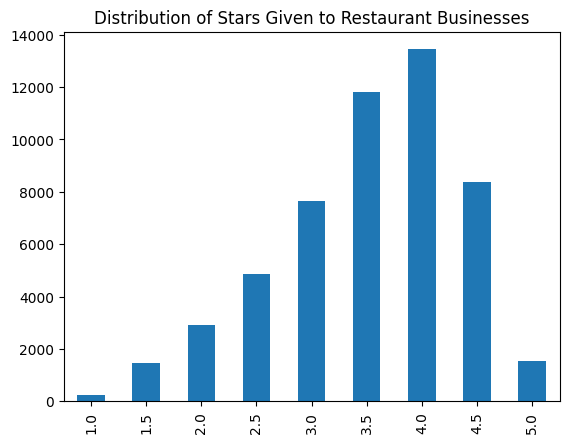

In [4]:
restaurants = businesswithattr[businesswithattr['categories'].str.contains('Restaurant', na = False)]
restaurants['stars'].value_counts().sort_index().plot(kind = 'bar', title = 'Distribution of Stars Given to Restaurant Businesses')

In [5]:
restaurants['stars'].describe()

count    52286.000000
mean         3.515234
std          0.829585
min          1.000000
25%          3.000000
50%          3.500000
75%          4.000000
max          5.000000
Name: stars, dtype: float64

In [6]:
restaurants['WiFi'].value_counts()

u'free'    14938
u'no'      11375
'no'        5656
'free'      5483
u'paid'      166
'paid'        95
None          36
Name: WiFi, dtype: int64

In [7]:
# dropping NAs for Wifi column
restaurants = restaurants.dropna(subset = ['WiFi'])
restaurants = restaurants.loc[restaurants['WiFi'] != 'None']
restaurants['WiFi'].value_counts()

u'free'    14938
u'no'      11375
'no'        5656
'free'      5483
u'paid'      166
'paid'        95
Name: WiFi, dtype: int64

In [8]:
restaurants['WiFi'] = restaurants['WiFi'].str.replace("u'free'", "free")
restaurants['WiFi'] = restaurants['WiFi'].str.replace("'free'", "free")
restaurants['WiFi'] = restaurants['WiFi'].str.replace("u'no'", "no")
restaurants['WiFi'] = restaurants['WiFi'].str.replace("'no'", "no")
restaurants['WiFi'] = restaurants['WiFi'].str.replace("u'paid'", "paid")
restaurants['WiFi'] = restaurants['WiFi'].str.replace("'paid'", "paid")
restaurants['WiFi'].value_counts()

free    20421
no      17031
paid      261
Name: WiFi, dtype: int64

<Axes: title={'center': 'Distribution of WiFi Availability'}>

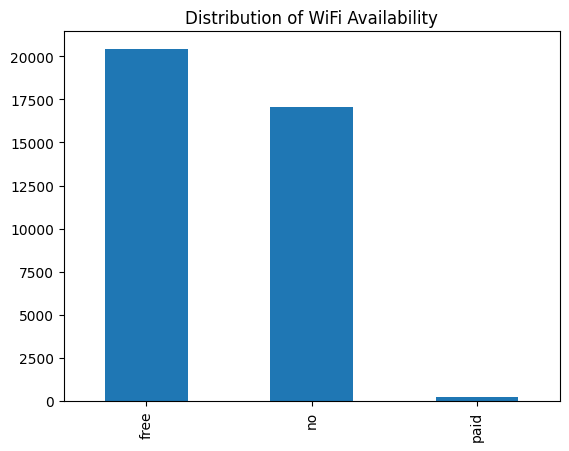

In [9]:
restaurants['WiFi'].value_counts().plot(kind = 'bar', title = 'Distribution of WiFi Availability')

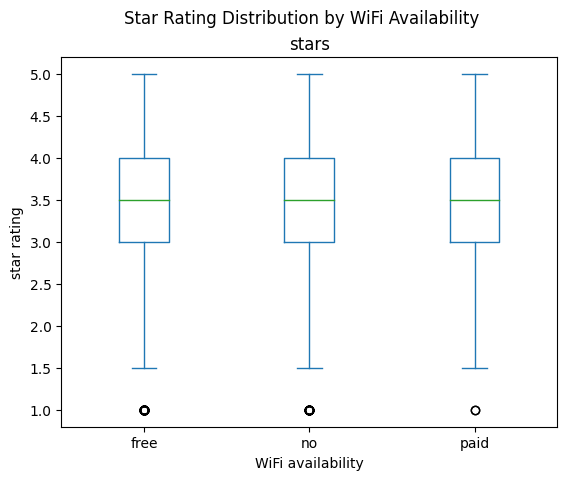

In [10]:
restaurants.plot.box(column = ['stars'], 
                 by = 'WiFi', 
                 xlabel = 'WiFi availability', 
                 ylabel = 'star rating',
                 title = 'Star Rating Distribution by WiFi Availability');

In [11]:
free = restaurants[restaurants['WiFi']== 'free']
no = restaurants[restaurants['WiFi']== 'no']
paid = restaurants[restaurants['WiFi'] == 'paid']
yes = restaurants[restaurants['WiFi'] != 'no']

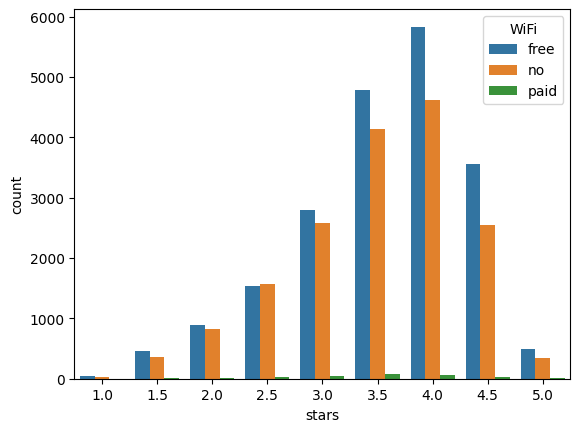

In [12]:
sns.countplot(restaurants, x='stars', hue='WiFi');

Text(0.5, 1.0, 'Distribution of Stars by WiFi Availability')

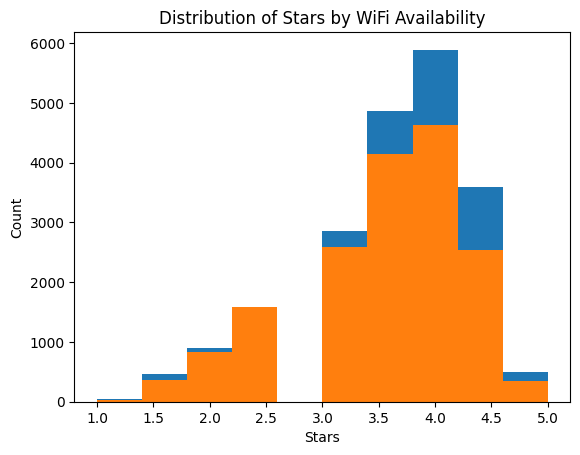

In [13]:
plt.hist(yes['stars'])
plt.hist(no['stars'])
plt.xlabel('Stars')
plt.ylabel('Count')
plt.title('Distribution of Stars by WiFi Availability')

In [14]:
print('median of businesses with free Wifi is', free['stars'].median())
print('median of businesses with paid Wifi is', paid['stars'].median())
print('median of businesses with Wifi is', yes['stars'].median())
print('median of businesses with no Wifi is', no['stars'].median())

print('mean of businesses with free Wifi is', free['stars'].mean())
print('mean of businesses with paid Wifi is', paid['stars'].mean())
print('mean of businesses with Wifi is', yes['stars'].mean())
print('mean of businesses with no Wifi is', no['stars'].mean())

median of businesses with free Wifi is 3.5
median of businesses with paid Wifi is 3.5
median of businesses with Wifi is 3.5
median of businesses with no Wifi is 3.5
mean of businesses with free Wifi is 3.593286322902894
mean of businesses with paid Wifi is 3.396551724137931
mean of businesses with Wifi is 3.5908035973310124
mean of businesses with no Wifi is 3.526804063178909


In [15]:
stats.weightstats.ttest_ind(yes['stars'], no['stars'])

(7.9737852618630995, 1.581942172947153e-15, 37711.0)

In [16]:
stats.weightstats.ttest_ind(free['stars'], paid['stars'])

(4.061896143015436, 4.885517862437894e-05, 20680.0)

In [17]:
n = 5000
sample_size = 500
t_stats = np.zeros(n)
p_values = np.zeros(n)
df = np.zeros(n)

for i in range(n):
    sample1 = np.random.choice(yes['stars'], sample_size, replace = True)
    sample2 = np.random.choice(no['stars'], sample_size, replace = True)

    t_stat, p_value, df = stats.weightstats.ttest_ind(
        sample1, sample2, usevar='unequal'
    )

    t_stats[i] = t_stat
    p_values[i] = p_value

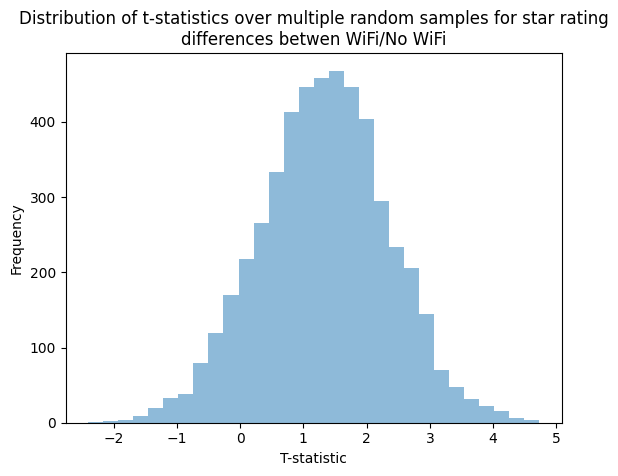

In [43]:
plt.hist(t_stats, bins=30, alpha=0.5)
plt.xlabel('T-statistic')
plt.ylabel('Frequency')
plt.title('Distribution of t-statistics over multiple random samples for star rating\ndifferences betwen WiFi/No WiFi')
plt.show()

In [28]:
t_stats[t_stats <= -2].size/n

0.0004

unlikely

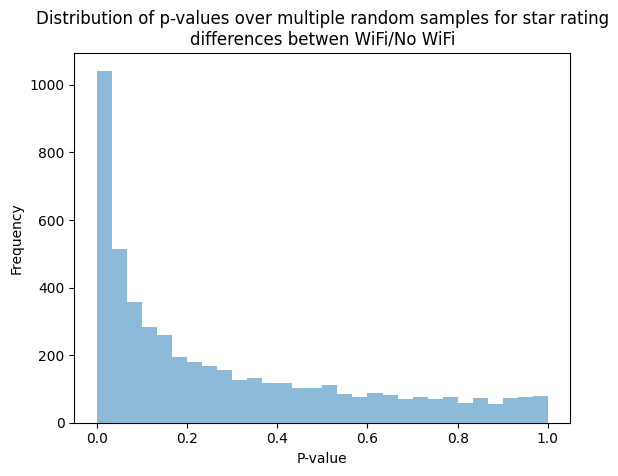

In [36]:
plt.hist(p_values, bins=30, alpha=0.5)
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of p-values over multiple random samples for star rating\ndifferences betwen WiFi/No WiFi')
plt.show()

In [37]:
p_values[p_values <= 0.05].size/n

0.2672

In [38]:
n2 = 5000
sample_size2 = 500
t_stats2 = np.zeros(n2)
p_values2 = np.zeros(n2)
df2 = np.zeros(n2)

for i in range(n2):
    sample3 = np.random.choice(free['stars'], sample_size, replace = True)
    sample4 = np.random.choice(paid['stars'], sample_size, replace = True)

    t_stat2, p_value2, df2 = stats.weightstats.ttest_ind(
        sample3, sample4, usevar='unequal'
    )

    t_stats2[i] = t_stat2
    p_values2[i] = p_value2

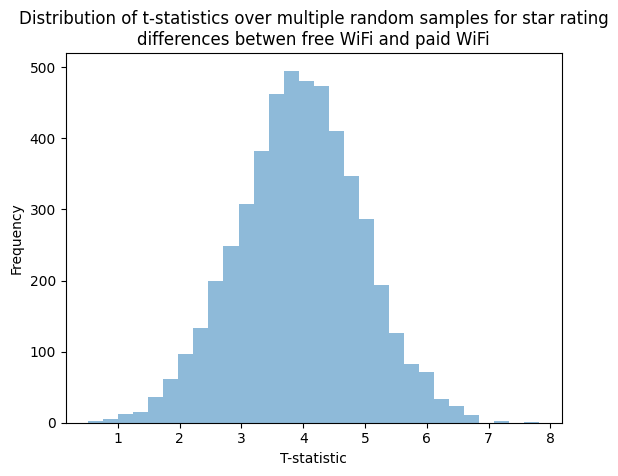

In [44]:
plt.hist(t_stats2, bins=30, alpha=0.5)
plt.xlabel('T-statistic')
plt.ylabel('Frequency')
plt.title('Distribution of t-statistics over multiple random samples for star rating\ndifferences betwen free WiFi and paid WiFi')
plt.show()

In [45]:
t_stats2[t_stats2 <= -2].size/n2

0.0

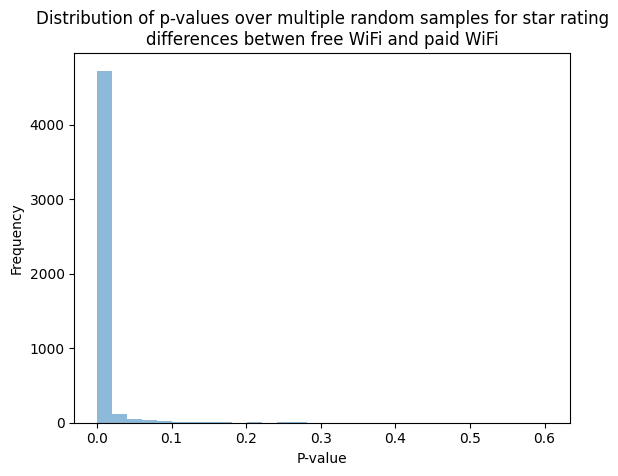

In [48]:
plt.hist(p_values2, bins=30, alpha=0.5)
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of p-values over multiple random samples for star rating\ndifferences betwen free WiFi and paid WiFi')
plt.show()

In [49]:
p_values2[p_values2 <= 0.05].size/n2

0.9754